In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import *

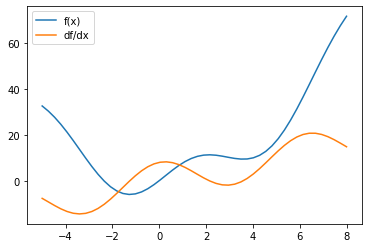

In [2]:
# create function
x = Symbol('x')
f = x**2 + 8*sin(x)

# derivative
df = f.diff(x)

# lambdify both
f = lambdify(x, f)
df = lambdify(x, df)

# evaluate
pts = np.linspace(-5, 8)
plt.plot(pts, f(pts), label='f(x)')
plt.plot(pts, df(pts), label='df/dx')
plt.legend()
plt.show()

In [3]:
max_iter = 100
momentum = 0.9
moment = [0]
with_momentum = [False, True]

strategy_steps = []

for use_momentum in with_momentum:
    lr = 0.05
    X0 = 10
    cur_iter = 0
    steps = [X0]
    while True:
        # sum last 3 momentum
        m = sum(moment[-3:])
        # get closer to a local min
        grad = lr * df(X0)
        if use_momentum:
            X1 = X0 + m - grad
        else:
            X1 = X0 - grad
        # save step
        steps.append(X1)
        # save grad
        moment.append(-grad)
        # previous moment are : 0.9*(grad N), 0.9*0.9*(grad N-1), etc.
        moment = [momentum*x for x in moment]
        # calculate step size
        step_size = X1 - X0
        # save new step
        X0 = X1
        if cur_iter > max_iter or abs(step_size) < 0.00001:
            print("Convergence done")
            break
        elif cur_iter%50 == 0:
            lr = lr*0.9
            print("Iteration {} has x value {}".format(cur_iter, X1))
        cur_iter = cur_iter + 1
    strategy_steps.append(steps)
    
print("The local minimum occurs at", X1)

Iteration 0 has x value 9.33562861163058
Convergence done
Iteration 0 has x value 9.335601301818732
Iteration 50 has x value -0.43245118234330016
Iteration 100 has x value -1.3861137512075625
Convergence done
The local minimum occurs at -1.080348902387584


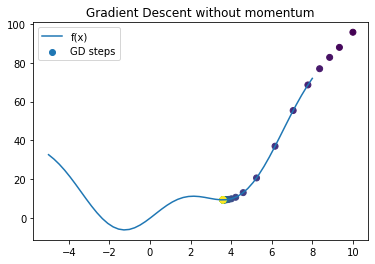

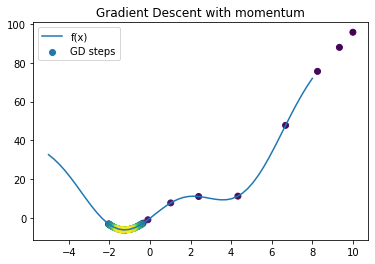

In [4]:
plt.figure(121)
steps = strategy_steps[0]
pts = np.linspace(-5, 8)
# change color to see GD progress
color = [item/255 for item in list(range(len(steps)))]
plt.plot(pts, f(pts), label='f(x)')
plt.scatter(steps, [f(x) for x in steps], label='GD steps', c=color)
plt.title('Gradient Descent without momentum')
plt.legend()
plt.show()

plt.figure(122)
steps = strategy_steps[1]
pts = np.linspace(-5, 8)
# change color to see GD progress
color = [item/255 for item in list(range(len(steps)))]
plt.plot(pts, f(pts), label='f(x)')
plt.scatter(steps, [f(x) for x in steps], label='GD steps', c=color)
plt.title('Gradient Descent with momentum')
plt.legend()
plt.show()